# ✅                                                  Patent Extraction

##                              Prepare Knowledge Graphs based on term extraction in Patents under Healthcare Domain

- Group Members:
    - BHATT Ragi
    - HACHEM Racha

---

## Methodology

- Term Extraction: try different methodologies to extract terms from patents, see what method gives the best terms.
- Prepare the Gold Corpus
- Train the Spacy Model
- Annotate with Prodigy
- Evaluate the model performance
- Plot Discussions
- Conclusion

### Import the libraries and load the patents file

In [1]:
import re, regex, timeit, gzip, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy
#from sense2vec import Sense2Vec
from collections import Counter
from nltk.tokenize import MWETokenizer
from nltk.util import Trie
tqdm.pandas()
spacy.__version__ 
##!pip install jupyterlab-prodigy
from spacy.tokens import Span
from spacy.tokens import DocBin
from spacy import displacy
from spacy.util import filter_spans
from spacy.matcher import PhraseMatcher
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
# this turns on the autotimer, so that every cell has a timing information below
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime
# stop using:
# %unload_ext autotime

time: 0 ns (started: 2023-05-05 18:04:22 +02:00)


In [3]:
#Load A61b into a spaCy document
a61b = open('A61B.txt').read().strip()
a61b_lines = a61b.split('\n')

print(len(a61b_lines), 'paragraphs of patent text')

patent_texts = a61b.split('\n\n')
patent_lines = a61b.split('\n')



299024 paragraphs of patent text
time: 1.44 s (started: 2023-05-05 18:04:27 +02:00)


### Term Extraction by Count Vectorizer

In [6]:
#Vectorize the patent text function
def get_feature_names(vectorizer):
    if hasattr(vectorizer, 'get_feature_names'):
        return vectorizer.get_feature_names()
    else:
        return vectorizer.get_feature_names_out()

time: 0 ns (started: 2023-05-04 20:15:23 +04:00)


In [7]:
#Apply count vectorizer to A61b
cvectorizer = CountVectorizer(min_df=2, max_df=1.0, stop_words='english', ngram_range=(2, 3))
X=cvectorizer.fit_transform(patent_lines)
X


<299024x3020562 sparse matrix of type '<class 'numpy.int64'>'
	with 21488125 stored elements in Compressed Sparse Row format>

time: 1min 2s (started: 2023-05-04 20:15:23 +04:00)


In [8]:
X = pd.DataFrame(np.sum(X, axis=0), columns=get_feature_names(cvectorizer)).T.sort_values(by = 0, ascending = False)

time: 4.09 s (started: 2023-05-04 20:16:26 +04:00)


In [9]:
X.head(20)

0
surgical instrument        49086
end effector               47421
patent application         26718
control circuit            22766
distal end                 22213
present invention          18867
staple cartridge           18772
application serial         18623
patent application serial  18548
present disclosure         16264
surgical hub               15252
shown fig                  13543
proximal end               13527
shaft assembly             12555
firing member              10351
illustrated fig             9339
cross sectional             8562
stapling instrument         8552
surgical procedure          8474
control unit                8388

time: 32 ms (started: 2023-05-04 20:16:30 +04:00)


### 🚧 Extracting Terms through RegEx, Trie Algorithm, Count Vectorizer with n-grams, and lastly a function with regex implemented to extract terms.

- What worked the best? Function written to extract terms, gave the most meaningful terms.

In [4]:
# here are the potential terms
mwes = open('A61B.txt').read().strip().split('\n')
print(mwes[33333:33338])
print(len(mwes),'mwes')

['Any of the processors or microcontrollers described herein, may be implemented by any single core or multicore processor such as those known under the trade name ARM Cortex by Texas Instruments. In one aspect, the processor may be an LM4F230H5QR ARM Cortex-M4F Processor Core, available from Texas Instruments, for example, comprising on-chip memory of 256 KB single-cycle flash memory, or other non-volatile memory, up to 40 MHz, a prefetch buffer to improve performance above 40 MHz, a 32 KB single-cycle serial random access memory (SRAM), internal read-only memory (ROM) loaded with StellarisWare® software, 2 KB electrically erasable programmable read-only memory (EEPROM), one or more pulse width modulation (PWM) modules, one or more quadrature encoder inputs (QEI) analog, one or more 12-bit Analog-to-Digital Converters (ADC) with 12 analog input channels, details of which are available for the product datasheet.', 'In one aspect, the processor may comprise a safety controller comprisin

In [11]:
n = 500
termlist = [re.escape(t) for t in mwes[:n]]
termregex = re.compile(r'\b'+r'\b|\b'.join(termlist), re.I)
termfreqs = Counter()
for i,li in tqdm(enumerate(a61b.split('\n'))):
    for m in termregex.finditer(li):
        termfreqs[m.group(0)]=termfreqs.get(m.group(0),0)+1
print(termfreqs.most_common(3))

0it [00:00, ?it/s]

[('', 61465739), ('material', 20564), ('general', 3523)]
time: 17min 58s (started: 2023-05-04 20:16:31 +04:00)


In [12]:
import nltk 

# Tokenize the patent text
patent_lin_tokens = []
for line in a61b.split('\n'):
    tokens = nltk.word_tokenize(line)
    patent_lin_tokens.extend(tokens)



time: 4min 14s (started: 2023-05-04 20:34:29 +04:00)


In [13]:
patent_lin_tokens

['SYSTEM',
 'AND',
 'METHOD',
 'FOR',
 'PROVIDING',
 'ELECTRICAL',
 'POWER',
 'TO',
 'A',
 'LOAD',
 '_____2019_____3500071_____503987801_____EP3500000.txt_____A61B_____A61B6/56',
 ':',
 'H02M2001/0077',
 ':',
 'H02M2007/4815',
 ':',
 'H02M7/493',
 ':',
 'H02M7/53871',
 ':',
 'H05G1/10',
 ':',
 'H05G1/14',
 'A',
 'system',
 '48',
 'for',
 'providing',
 'electrical',
 'power',
 'to',
 'a',
 'load',
 '50',
 'is',
 'provided',
 '.',
 'The',
 'system',
 '48',
 'includes',
 'at',
 'least',
 'two',
 'inverters',
 '114',
 ',',
 '116',
 'and',
 'at',
 'least',
 'two',
 'resonant',
 'circuits',
 '118',
 ',',
 '120',
 '.',
 'The',
 'inverters',
 '114',
 ',',
 '116',
 'are',
 'operative',
 'to',
 'electrically',
 'connect',
 'to',
 'a',
 'power',
 'source',
 '50',
 '.',
 'The',
 'resonant',
 'circuits',
 '118',
 ',',
 '120',
 'are',
 'each',
 'electrically',
 'connected',
 'to',
 'at',
 'least',
 'one',
 'of',
 'the',
 'inverters',
 '114',
 ',',
 '116',
 'and',
 'operative',
 'to',
 'provide',
 'e

time: 16 ms (started: 2023-05-04 20:38:44 +04:00)


In [14]:
from collections import Counter
from nltk.tokenize import MWETokenizer
from nltk.util import Trie

class FreqMWETokenizer(MWETokenizer):
    """A tokenizer that processes tokenized text and merges multi-word expressions
    into single tokens.
    """

    def __init__(self, mwes=None, separator="_"):
        super().__init__(mwes, separator)

    def freqs(self, text):
        """
        :param text: A list containing tokenized text
        :type text: list(str)
        :return: A frequency dictionary with multi-words merged together as keys
        :rtype: dict
        :Example:
        >>> tokenizer = FreqMWETokenizer([ mw.split() for mw in ['multilayer ceramic', 'multilayer ceramic capacitor', 'ceramic capacitor']], separator=' ')
        >>> tokenizer.freqs("Gimme that multilayer ceramic capacitor please!".split())
        {'multilayer ceramic': 1, 'multilayer ceramic capacitor': 1, 'ceramic capacitor': 1}
        """
        i = 0
        n = len(text)
        result = Counter()

        while i < n:
            if text[i] in self._mwes:
                # possible MWE match
                j = i
                trie = self._mwes
                while j < n and text[j] in trie:
                    if Trie.LEAF in trie:
                        # success!
                        mw = self._separator.join(text[i:j])
                        result[mw]=result.get(mw,0)+1
                    trie = trie[text[j]] # diving one step deeper into the trie
                    j = j + 1
                else: # executed if while did not break
                    if Trie.LEAF in trie:
                        # success!
                        mw = self._separator.join(text[i:j])
                        result[mw]=result.get(mw,0)+1
                    i += 1
            else:
                i += 1

        return result


time: 16 ms (started: 2023-05-04 20:38:44 +04:00)


In [15]:
#Apply the tokenizer to the patent text
n = 500
patent_tok = FreqMWETokenizer([ mw.split() for mw in mwes[:n]], separator=' ')

time: 94 ms (started: 2023-05-04 20:38:44 +04:00)


In [16]:
# here are the potential terms
patent_tok.freqs(patent_lin_tokens)

Counter({'': 3359614,
         'SYSTEM AND METHOD FOR PROVIDING ELECTRICAL POWER TO A LOAD': 1,
         'ATRIAL APPENDAGE CLIP': 1,
         'Technical Field': 392,
         'Background': 528,
         'Summary': 384,
         'Brief Description of the Drawings': 120,
         'Detailed Description of the Embodiments': 5,
         'First embodiment': 37,
         'Second embodiment': 36,
         'Third embodiment': 18,
         'ATRIAL APPENDAGE CLAMP DELIVERY SYSTEM': 1,
         'PACKAGE FOR SUTURES AND NEEDLES': 1,
         'TECHNICAL FIELD': 335,
         'PRIOR ART': 39,
         'SUMMARY': 1259,
         'SUMMARY OF THE INVENTION': 527,
         'BRIEF DESCRIPTION OF THE DRAWINGS': 1056,
         'DESCRIPTION OF THE PREFERRED EMBODIMENT': 18,
         'A BODY FLUID LEAKAGE DETECTION AQUEOUS COMPOSITION': 1,
         'FIELD OF THE INVENTION': 268,
         'BACKGROUND': 1345,
         'DETAILED DESCRIPTION': 1039,
         'EXPERIMENTAL': 4,
         'Material': 48,
         'Ge

time: 11.5 s (started: 2023-05-04 20:38:45 +04:00)


In [17]:
#tyoe of patent_tok
type(patent_tok)

__main__.FreqMWETokenizer

time: 15 ms (started: 2023-05-04 21:06:51 +04:00)


In [18]:
#Apply the count vectorizer to the patent tokens

vectorizer_tok = CountVectorizer(min_df=2, max_df=1.0, stop_words='english', ngram_range=(2, 3))
X_tok=vectorizer_tok.fit_transform(patent_lin_tokens)
X_tok

<33695066x26708 sparse matrix of type '<class 'numpy.int64'>'
	with 353290 stored elements in Compressed Sparse Row format>

time: 2min 8s (started: 2023-05-04 21:06:52 +04:00)


In [19]:
X_tok = pd.DataFrame(np.sum(X_tok, axis=0), columns=get_feature_names(vectorizer_tok)).T.sort_values(by = 0, ascending = False)

time: 141 ms (started: 2023-05-04 21:09:13 +04:00)


In [20]:
X_tok.sum(axis=0).shape

(1,)

time: 16 ms (started: 2023-05-04 21:09:14 +04:00)


In [21]:
X_tok.head(20)

0
cross sectional       7934
disclosure fig        4350
cloud based           3062
15 940                2641
1a 1n                 2181
2a 2m                 2110
15 385                1850
real time             1837
end effector          1634
cross section         1592
computer readable     1448
non volatile          1420
1n 2a 2m              1411
1n 2a                 1411
1a 1n 2a              1410
704a 704e             1369
mg dl                 1349
non transitory        1294
computer implemented  1245
non limiting          1212

time: 16 ms (started: 2023-05-04 21:09:15 +04:00)


In [22]:
get_feature_names(vectorizer_tok)[X_tok.sum(axis=0).argmax()]

'00 00'

time: 31 ms (started: 2023-05-04 21:09:15 +04:00)


In [23]:
#top 10 terms
X_tok.head(10)

0
cross sectional  7934
disclosure fig   4350
cloud based      3062
15 940           2641
1a 1n            2181
2a 2m            2110
15 385           1850
real time        1837
end effector     1634
cross section    1592

time: 15 ms (started: 2023-05-04 21:09:16 +04:00)


<AxesSubplot: >

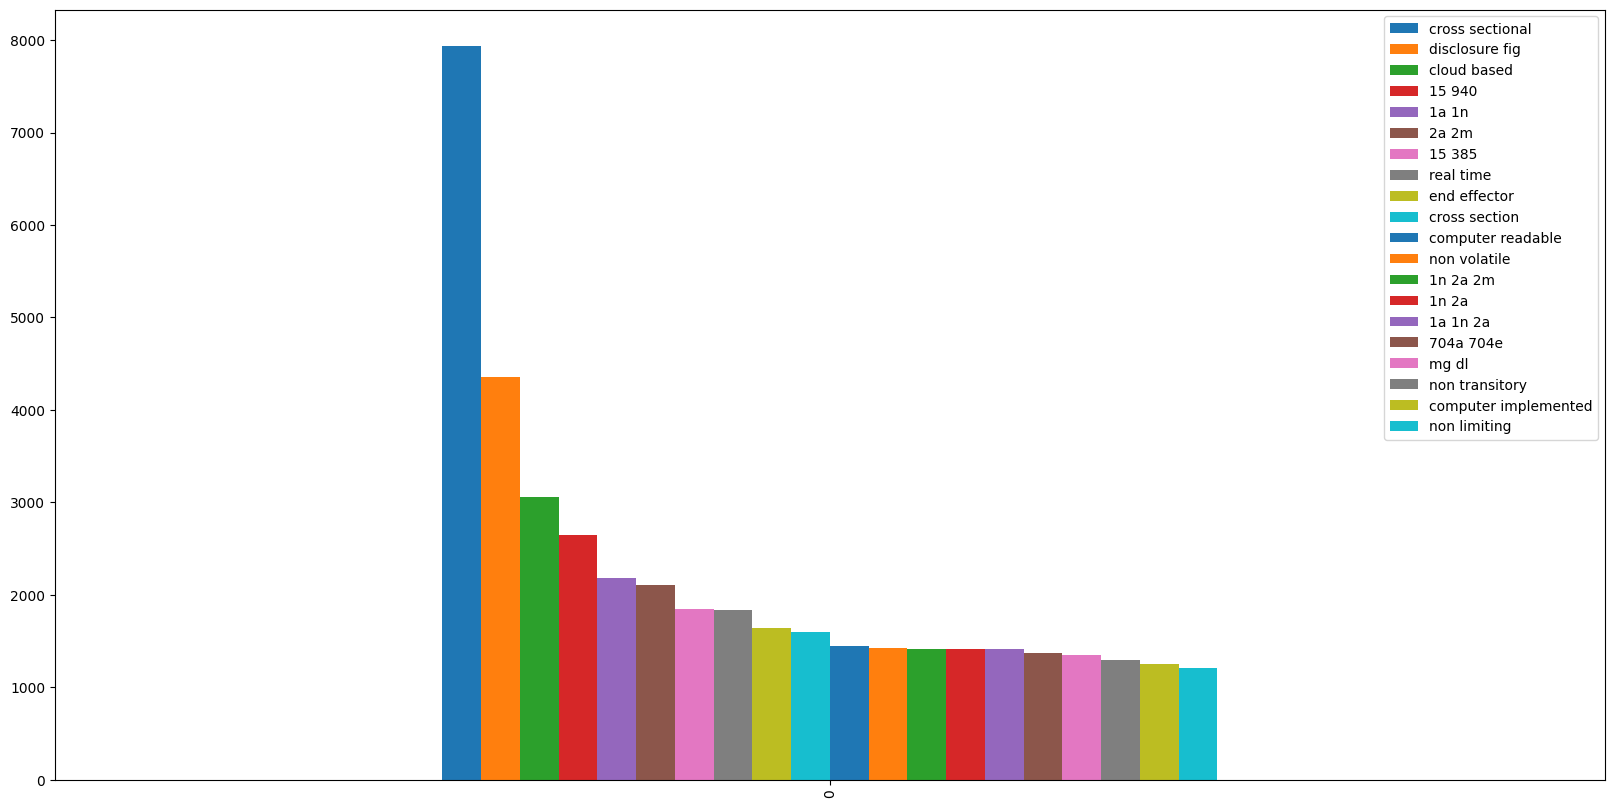

time: 406 ms (started: 2023-05-04 21:09:16 +04:00)


In [24]:
#Better info for the top 10 terms
X_tok.head(20).T.plot.bar(figsize=(20,10))

In [25]:
#Apply the count vectorizer to the patent text
n = 500
termlist = [re.compile(r'\b{}\b'.format(re.escape(t)), re.I) for t in mwes[:n]]
termregex = re.compile(r'(?i)(\b\w+(?=\s+\w+\s+\w+\s+\w+\s+\d+))\s+(\d+)'.format('|'.join([t.pattern for t in termlist])), re.I)
termfreqs = Counter()
for i, li in tqdm(enumerate(a61b.split('\n'))):
    for m in termregex.finditer(li):
        termfreqs[m.group(0)] = termfreqs.get(m.group(0), 0) + 1
print(termfreqs.most_common(3))


0it [00:00, ?it/s]

[('IEC 61508', 255), ('Example 1', 251), ('claim 1', 193)]
time: 29.6 s (started: 2023-05-04 21:09:17 +04:00)


In [26]:
#Sort this list in a descending order
dict(sorted(termfreqs.items(), key=lambda item: item[1], reverse=True))

{'IEC 61508': 255,
 'Example 1': 251,
 'claim 1': 193,
 'circuit 2510': 103,
 'from 1': 81,
 'Claim 1': 72,
 'about 1': 71,
 'Example 15': 67,
 'hub 300': 62,
 'Example 8': 55,
 'the 3': 49,
 'Example 12': 49,
 'from 10': 48,
 'between 1': 45,
 'hub 106': 42,
 'circuit 610': 42,
 'circuit 21002': 40,
 'Example 9': 40,
 'beam 2514': 40,
 'Example 10': 40,
 'of 1': 39,
 'position 2586': 38,
 'Example 13': 38,
 'cloud 7004': 37,
 'anvil 201804': 36,
 'about 2': 36,
 'between 55': 35,
 'upper 168': 33,
 'step 4002': 32,
 'pixels 1515': 32,
 'Example 7': 32,
 'end 102': 31,
 'system 9100': 30,
 'claim 9': 29,
 'hub 5104': 29,
 'between 5': 28,
 'device 100': 28,
 'cap 20': 28,
 'Example 11': 28,
 'about 5': 27,
 'Figure 1': 26,
 'the 2': 26,
 'system 100': 26,
 'accumulator 4206': 26,
 'instrument 10': 24,
 'claim 8': 24,
 'from 55': 24,
 'about 30': 24,
 'Example 17': 24,
 'between 10': 24,
 'about 35': 23,
 'claim 11': 23,
 'Example 19': 23,
 'jaw 612': 23,
 'from 2': 22,
 'about 20': 22,

time: 31 ms (started: 2023-05-04 21:09:46 +04:00)


In [7]:
# Improving Term extraction from patent text

"""
###
#usage:
#patents[0]: one patent
#extracts the terms from the description of this patent
first_dictionary_term = get_possible_terms(patents[0])
#get the longest common substring
longest_common_terms = find_terms_patent(first_dictionary_term)
###
"""

def get_possible_terms(patent, stop_words=''):
    """
    Extracts a dictionary of potential terms from the description of a patent.
    Parameters:
        patent (str): The patent text.
    Returns:
        description_dict: A dictionary where each key (number) is associated with a list of terms of up to 4 words that are followed by the number.
    """
    #get description from patent
    if "_____d:" in patent:
      description = patent.split("_____d:")[1]
    else:
      description = patent
    #cut out the claims part
    description = description.split("_____c:")[0]
    
    #match strings of format with words being able to be repeated up to 4 times but at least once before a number
    regex_numerical = re.compile(r"(?:[A-Za-z]+ ){1,4}\d+")
    description_terms = regex_numerical.findall(description)

    #regex matching the last number in a string
    regex_last_number = re.compile(r"\d+$")
    description_dict = dict()
    for i in range(len(description_terms)):
        words = description_terms[i].split()
        # Remove stop words from the matched term
        for stop_word in stop_words:
            if stop_word in words:
                words.remove(stop_word)
        term = ' '.join(words)
        #get the number from the matched term
        number = regex_last_number.findall(term)
        #convert the number list to an int
        number = int(number[-1])

        if number not in description_dict.keys():
            #create list of terms that have the same number
            description_dict[number] = [term.replace(" %d" %number ,"")]
        else:
            #add the term to the list
            description_dict[number].append(term.replace(" %d" %number ,""))
    return description_dict
    
    
def longest_term_end(s1, s2):
    """
    Finds the longest list of terms that are at the end of both strings.
    Parameters:
        s1, s2: strings or None if a previous match was not found
    Returns:
        longest_term: longest term that is at the end of both strings or None if there is no match
    """
    if s1 is None or s2 is None:
        return None
    #split the strings into lists of terms
    s1 = s1.lower().split()
    s2 = s2.lower().split()
    #find the longest list of terms that are at the end of both strings
    longest_term = ""
    for i in range(min(len(s1), len(s2))):
        if s1[-i-1] == s2[-i-1]:
            longest_term = s1[-i-1] + " " + longest_term
        else:
            break
    if len(longest_term) > 0:
        #remove the last space and return the longest term
        return longest_term[:-1]
    else:
        #return None if there is no match between the two strings
        return None
        
        
def find_terms_patent(patent_description_dict):
    """
    Finds the longest common substring in all values for each key in the patent description dictionary.
    Parameters:
        patent_description_dict: dictionary with keys being numbers and values being lists of terms
    Returns:
        patent_description_longest_term: dictionary with keys being numbers and values being the longest common substring in all values for each key
    """
    #finds the longest common substring in all values for each key
    description_longest_terms = dict()
    for key in patent_description_dict.keys():
        possible_terms = patent_description_dict[key]
        #iterate through all pairs
        longest_word = possible_terms[0].lower()
        for i in range(1, len(possible_terms)):
            longest_word = longest_term_end(longest_word, possible_terms[i])
        #replace the old values with the longest common substring to the dictionary
        description_longest_terms[key] = longest_word
    return description_longest_terms      

time: 0 ns (started: 2023-05-05 18:04:53 +02:00)


In [9]:
#First terms 
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) 
first_dictionary_term = get_possible_terms(patent_texts[0], stop_words=stop_words)
first_dictionary_term



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{10: ['medical imaging system',
  'system',
  'imaging system',
  'imaging system',
  'imaging system',
  'understood systems',
  'system',
  'processor systems',
  'processor systems'],
 12: ['image structure',
  'imaged structure',
  'within structure',
  'contrast structure'],
 14: ['patient',
  'patient',
  'patient',
  'imaging patient',
  'minimizing movement'],
 18: ['radiation source',
  'The radiation source',
  'radiation source',
  'radiation source',
  'radiation source',
  'radiation source'],
 20: ['radiation detector',
  'radiation detector',
  'radiation detector',
  'detector',
  'received detector',
  'control detector',
  'detector'],
 22: ['controller',
  'communicated controller',
  'controller',
  'adapts controller',
  'adapt controller',
  'received controller',
  'controller'],
 24: ['display screen', 'display screen', 'display screen', 'display screen'],
 26: ['projects radiation beam', 'The radiation beam', 'The radiation beam'],
 30: ['plurality images',
  '

time: 47 ms (started: 2023-05-05 18:05:26 +02:00)


In [10]:
#Now we create a df with all the terms from the patents
#We will use the first 500 patents
patent_terms_list = []
for patent in patent_texts:
    patent_terms_dict = get_possible_terms(patent, stop_words=stop_words)
    #patent_terms_dict = find_terms_patent(patent_terms_dict)
    for key in patent_terms_dict.keys():
        patent_terms_list.append({'term': patent_terms_dict[key], 'count': int(key)})
patent_terms_df = pd.DataFrame(patent_terms_list)


time: 1min 21s (started: 2023-05-05 18:05:32 +02:00)


In [11]:
patent_terms_df.shape

(222774, 2)

time: 15 ms (started: 2023-05-05 18:06:54 +02:00)


In [12]:
# get the most recurrent term from each list
def most_common(lst):
    return max(set(lst), key=lst.count)

patent_terms_df['most_recurrent'] = patent_terms_df['term'].apply(most_common)

time: 485 ms (started: 2023-05-05 18:06:54 +02:00)


In [13]:
# terms that are only numbers
patent_terms_df['most_recurrent'].str.contains(r'[0-9]').sum()

15062

time: 172 ms (started: 2023-05-05 18:06:55 +02:00)


In [14]:
# removing meaningless terms like numbers
patent_terms_df = patent_terms_df[~patent_terms_df['most_recurrent'].str.contains(r'[0-9]')]

time: 188 ms (started: 2023-05-05 18:07:01 +02:00)


# 🚧 Prepare the silver Corpus

In [38]:
from collections import defaultdict

time: 0 ns (started: 2023-05-04 21:12:41 +04:00)


In [39]:
patentDF = pd.DataFrame(columns=["title", "text", "type", "terms"])
patentDF

Empty DataFrame
Columns: [title, text, type, terms]
Index: []

time: 15 ms (started: 2023-05-04 21:12:41 +04:00)


In [40]:
newpatent = True
terms = {}
title = ""
text = ""
i = 0
bound = len(patent_lines)

pbar = tqdm(total=bound)
while i+1 < bound:
    if newpatent:
        title = patent_lines[i]
        text = ""
        terms = {}
        i+=1
        newpatent = False
    elif patent_lines[i] == "" and patent_lines[i+1] == "":
        newpatent = True

        #help from chatgpt
        #-----
        truetermdict = {}
        for termid in terms:
            freq = defaultdict(int)

            for c in terms[termid]:
                for j in range(len(c)):
                    term = ' '.join(c[j:])
                    freq[term] += 1

            if not freq:
                continue
            most_likely_term = max(freq, key=freq.get)
            if not ("FIG" in most_likely_term or "FIGS" in most_likely_term):
                truetermdict[termid] = most_likely_term
        #-----

        patentDF.loc[len(patentDF)] = [
            title,
            text,
            "R" if truetermdict else "N",
            truetermdict
        ]
        i+=1
    else:
        text += patent_lines[i]+"\n"
        words = patent_lines[i].split()
        for j in range(len(words)):
            if words[j].isnumeric():
                #potential term id
                try:
                    termid = int(words[j])
                except ValueError:
                    continue
                if not termid in terms:
                    terms[termid] = []
                toadd = words[max(0, j-4):j]
                if toadd not in terms[termid]:
                    terms[termid].append(words[max(0, j-4):j])
    i+=1
    pbar.update(i - pbar.n)
pbar.close()

  0%|          | 0/299024 [00:00<?, ?it/s]

time: 18.2 s (started: 2023-05-04 21:12:42 +04:00)


In [41]:
patentDF.terms[0]

{48: 'system',
 50: 'load',
 116: '114,',
 120: 'resonant circuits 118,',
 10: 'system',
 14: 'patient',
 12: 'structure',
 18: 'radiation source',
 26: 'radiation beam',
 28: 'region of interest ("ROI")',
 30: 'images',
 32: 'video feed',
 20: 'detector',
 22: 'the controller',
 34: 'at least one processor/CPU',
 36: 'least one memory device',
 42: '38, 40, and',
 44: 'inverter',
 46: 'resonant circuit',
 58: 'switches 52, 54, 56,',
 72: 'capacitors 66, 68, 70,',
 92: 'input leads 90,',
 88: 'resisters 82, 84, 86,',
 94: 'between the output leads',
 132: 'leads 126, 128, 130,',
 140: 'output lead',
 148: 'leads 142, 144, 146,',
 122: 'sources',
 114: 'embodiments, the inverters',
 118: 'the resonant circuits',
 134: 'as follows: output lead',
 136: 'lead 142; output lead',
 138: 'output lead',
 106: 'be connected to lead',
 108: 'be connected to lead',
 150: 'couplings: k1 = inductors',
 154: 'k2 = inductors',
 158: 'inverters and the bricks/modules',
 160: '158 and',
 98: 'the power 

time: 15 ms (started: 2023-05-04 21:13:01 +04:00)


In [42]:
patentDF.type.value_counts()

R    1996
N       2
Name: type, dtype: int64

time: 0 ns (started: 2023-05-04 21:13:01 +04:00)


In [43]:
patentDF

title  \
0     SYSTEM AND METHOD FOR PROVIDING ELECTRICAL POW...   
1                                 ATRIAL APPENDAGE CLIP   
2                ATRIAL APPENDAGE CLAMP DELIVERY SYSTEM   
3                       PACKAGE FOR SUTURES AND NEEDLES   
4     A BODY FLUID LEAKAGE DETECTION AQUEOUS COMPOSI...   
...                                                 ...   
1993  DEVICE AND METHOD FOR DETERMINING A VOLUME OF ...   
1994      DEVICE AND METHOD FOR DETERMING DENTAL PLAQUE   
1995                     PRESENCE OR ACTIVITY DETECTION   
1996  BLOOD PRESSURE ESTIMATING DEVICE, BLOOD PRESSU...   
1997  TOOTH SOUNDNESS DETERMINATION ASSISTANCE DEVIC...   

                                                   text type  \
0     A system 48 for providing electrical power to ...    R   
1     Disclosed is an atrial appendage clip, includi...    R   
2     Disclosed is an atrial appendage clip delivery...    R   
3     A package (10) for surgical sutures comprises ...    R   
4     A body fluid leakage detection aqueous composi...    R   
...                                                 ...  ...   
1993  The present invention relates to a device for ...    R   
1994  The invention concerns a device (20) and a met...    R   
1995  A method is disclosed for generating an output...    R   
1996  A blood pressure estimation apparatus includes...    R   
1997  A tooth soundness determination assistance dev...    R   

                                                  terms  
0     {48: 'system', 50: 'load', 116: '114,', 120: '...  
1     {1: 'first clip arm', 2: 'second clip arm', 3:...  
2     {1: 'Fig.', 2: 'second clip arm', 3: 'handle s...  
3     {2: 'EP', 172: 'EP 2', 157: 'EP 2 172', 3: 'EP...  
4     {2: 'EP', 857: 'EP 2', 1334: '(cf. 2015; 149: ...  
...                                                 ...  
1993  {180: 'varies over more than', 1: 'claims', 2:...  
1994  {1: 'of claims', 126: 'tooth', 2: 'to the appe...  
1995  {1: 'system', 2: 'space', 3: 'with an exemplar...  
1996  {1: 'user', 2012: 'No. 6, pp. 285-294,', 3: 'a...  
1997  {100: 'health assessment assisting system', 10...  

[1998 rows x 4 columns]

time: 47 ms (started: 2023-05-04 21:13:02 +04:00)


## 🪐Train Spacy model on our patent text

In [16]:
import spacy
from spacy.matcher import PhraseMatcher

a61b_use=open('A61B.txt').read().strip()

from spacy.util import filter_spans
from spacy import displacy
from spacy.tokens import DocBin
from spacy.tokens import Span

patent_texts = a61b_use.split('\n\n')
patent_lines = a61b_use.split('\n')

nlp = spacy.load("en_core_web_sm")
doc = nlp(patent_texts[0][25000:28000]) # 
displacy.render(doc, style="ent", jupyter = True)

time: 2.58 s (started: 2023-05-05 18:07:18 +02:00)


In [17]:
import spacy

# Load the English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Define a function to remove stop words from a string
def remove_stopwords(text):
    doc = nlp(text)
    return " ".join([token.text for token in doc if not token.is_stop])

# Apply the function to the 'most_recurrent' column of the DataFrame
patent_terms_df['most_recurrent'] = patent_terms_df['most_recurrent'].apply(remove_stopwords)


time: 23min 35s (started: 2023-05-05 18:07:28 +02:00)


In [18]:
#1. the phrase matcher based on patent_terms_df unique recurrent terms
new_toks = patent_terms_df['most_recurrent'].unique()
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
patterns = [nlp.make_doc(text) for text in new_toks]
matcher.add("Tech", patterns)

time: 1.8 s (started: 2023-05-05 18:31:03 +02:00)


In [19]:
#2. Divide the train and test set
from sklearn.model_selection import train_test_split
train_lines, test_lines = train_test_split(patent_lines, test_size=0.3, random_state=42)

time: 188 ms (started: 2023-05-05 18:31:05 +02:00)


In [20]:
#3. During training, for each example, a doc is created and the pre-defined Phrase Matcher identifies terms in the text, 
#attaching the label TT using Span if found, ignoring if not, then filter_span() removes overlaps and adds the terms to 
#entities attribute of each doc, with the process repeated for each example.

LABEL = "TT"
doc_bin_train = DocBin() # create a DocBin object

# nlp.max_length = 2000000
for training_example  in tqdm(train_lines[:30000]): #~50 patents
    doc = nlp.make_doc(training_example) 
    ents = []
    
    for match_id, start, end in matcher(doc):
        #print(i,"Matched based on lowercase token text:", doc[:10], '::::::::',doc[start:end],start, end)
        span = Span(doc, start, end, label=LABEL)
        #print(span, span.label_)
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)

    filtered_ents = filter_spans(ents)
    print(filtered_ents[:3])
    doc.ents = filtered_ents 
    doc_bin_train.add(doc)

  0%|          | 0/30000 [00:00<?, ?it/s]

[Aspects, implemented, include]
[processor, configured, select]
[illumination sources, configured, energy]
[need, clip, structure]
[FIG, illustrates, diagram]
[Referring, FIG, hub]
[reference, FIG, electrodes]
[eye, method according, aspect]
[skin condition detection module, acquires, vertical distance]
[drive assembly, advanced, proximal]
[approach, intermediate, CT images]
[present invention, valves, heart]
[selected, consideration, present]
[referring, FIGS, capsule]
[configuration, moving mechanism, object stage]
[portion, delivery system, operator]
[embodiments, better, read]
[provide, end, effector]
[sensor, example, strain gauge]
[market, layered bags, hand]
[application, uses, example]
[embodiments, instrument, present invention]
[sterilization, tray, claim]
[probe, blood flow, signal]
[aspects, bone plate, contact]
[inverter, includes, output terminal]
[example, measurement, provide]
[absolute positioning system, comprise, programmed]
[aspects, method, include]
[example, arm, 

In [21]:
LABEL = "TT"
doc_bin_valid = DocBin() # create a DocBin object
nlp = spacy.blank("en")
# nlp.max_length = 2000000
for training_example  in tqdm(test_lines[:10000]): #~15 patents
    doc = nlp.make_doc(training_example) 
    ents = []
    
    for match_id, start, end in matcher(doc):
        #print(i,"Matched based on lowercase token text:", doc[:10], '::::::::',doc[start:end],start, end)
        span = Span(doc, start, end, label=LABEL)
        #print(span, span.label_)
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)

    filtered_ents = filter_spans(ents)
    print(filtered_ents[:3])
    doc.ents = filtered_ents 
    doc_bin_valid.add(doc)

  0%|          | 0/10000 [00:00<?, ?it/s]

[providing, operating, insertion tube]
[femur plate, claim, shaft region]
[assembly, claim, syringe]
[present, embodiment, scan pattern]
[method, implemented, navigation routine]
[buttons, control unit, generates]
[Fig, flow diagram, method]
[device, selected, group]
[case, rate, smaller]
[printed circuit board, disposed, outside]
[different, user, user]
[Referring, FIG, lock sleeve]
[provides, information, groups]
[embodiment, agent, contains]
[Storage unit, stores, ID]
[Fig, block diagram, configuration]
[apparatus according, claim, elements]
[surgical data network, network, hubs]
[hub modular enclosure, includes, drawers]
[Fig, view, view]
[surgical evacuation system, initially, operate]
[endoscope system, described, detail]
[Computer program, comprising, program code]
[described, present invention, scope]
[electronic device, include, controller]
[control unit, typically, control]
[latch receiving portion, coupled, fixed]
[Similar, ratio, evaluate]
[Surface, Image, angle]
[imaging f

In [22]:
LABEL = "TT"
doc_bin_test = DocBin() # create a DocBin object
nlp = spacy.blank("en")
# nlp.max_length = 2000000
for training_example  in tqdm(test_lines[10000:12000]): #~5 patents
    doc = nlp.make_doc(training_example) 
    ents = []
    
    for match_id, start, end in matcher(doc):
        #print(i,"Matched based on lowercase token text:", doc[:10], '::::::::',doc[start:end],start, end)
        span = Span(doc, start, end, label=LABEL)
        #print(span, span.label_)
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)

    filtered_ents = filter_spans(ents)
    print(filtered_ents[:3])
    doc.ents = filtered_ents 
    doc_bin_test.add(doc)

  0%|          | 0/2000 [00:00<?, ?it/s]

[Reference, graph, embodiments]
[distal head, defines, head]
[order, thermal conductivity, fine particles]
[second segment link, plurality, segment links]
[REFERENCE, APPLICATIONS]
[FIG, common control module, comprise]
[high, frequency treatment instrument, according]
[embodiments, determined, instead]
[effects, include, ablation]
[Apparatus according, claim, comprises]
[number, embodiments, described]
[acquired, data, parameters]
[Example, method, operating]
[shells, seat, spring]
[application, claims, Provisional Patent Application]
[observed, different, observed]
[treatment, visible light, infrared light]
[surgical instruments, preferred, open]
[According, embodiment, method]
[Referring, FIG, stapling instrument]
[Figure, illustrates, tips]
[agent, agent, agent]
[Imaging, Laser]
[Device, claim, processor]
[system, according, claims]
[Group, present, application]
[measurements, tissue, compression]
[limiting, example, detected]
[EPO]
[According, present invention, computer readable 

In [23]:
doc_bin_train.to_disk("training_data.spacy") # save the docbin object
doc_bin_valid.to_disk("valid_data.spacy") # save the docbin object
doc_bin_test.to_disk("test_data.spacy") # save the docbin object

# save train_lines to txt file
with open('train_lines.txt', 'w') as f:
    for line in train_lines:
        f.write(line)
        f.write('\n')
f.close()

# save train_lines to txt file
with open('valid_lines.txt', 'w') as f:
    for line in test_lines[:10000]:
        f.write(line)
        f.write('\n')
f.close()

# save test_lines to txt file
with open('test_lines.txt', 'w') as f:
    for line in test_lines[10000:12000]:
        f.write(line)
        f.write('\n')
f.close()

time: 14.8 s (started: 2023-05-05 18:32:11 +02:00)


In [67]:
!python -m spacy init fill-config base_config.cfg config.cfg

⚠ Nothing to auto-fill: base config is already complete
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy
time: 6.75 s (started: 2023-05-04 21:20:43 +04:00)


c:\Users\ragib_rridy9t\anaconda3\envs\lol\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\ragib_rridy9t\anaconda3\envs\lol\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\ragib_rridy9t\anaconda3\envs\lol\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\ragib_rridy9t\anaconda3\envs\lol\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


# Training the Spacy Model (iter1)

In [103]:
!python -m spacy train config.cfg --output ./spacy_output --paths.train ./training_data.spacy --paths.dev ./valid_data.spacy

ℹ Saving to output directory: spacy_outputtime: 4h 45min 47s (started: 2023-05-05 14:48:49 +04:00)


c:\Users\ragib_rridy9t\anaconda3\envs\lol\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\ragib_rridy9t\anaconda3\envs\lol\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\ragib_rridy9t\anaconda3\envs\lol\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\Users\ragib_rridy9t\anaconda3\envs\lol\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
[2023-05-05 14:48:53,676] [INFO] Set up nlp object from config
[2023-05-05 14:48:53,692] [INFO] Pipeline: ['tok2vec', 'ner']
[2023-05-05 14:48:53,692] [INFO] Created vocabu


ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     73.00   20.59   16.01   28.85    0.21
  0     200        170.96   7624.50   70.13   68.68   71.64    0.70
  0     400        184.53   4110.62   78.62   80.14   77.16    0.79
  0     600        183.77   3548.60   81.02   82.56   79.54    0.81
  0     800        185.75   3703.40   82.19   84.54   79.96    0.82
  0    1000        159.95   3569.61   84.24   85.81   82.73    0.84
  0    1200        184.71   3668.50   85.32   84.94   85.70    0.85
  0    1400        209.44   3814.35   85.68   86.93   84.47    0.86
  0    1600        232.31   4348.35   86.66   85.89   87.45    0.87

In [104]:
# Load best model
nlp_ner = spacy.load("./spacy_output/model-best")

# Just text snippet
doc = nlp_ner("Reference is now made to graph 51. In some embodiments, processor 20 is configured to apply the PCA on the 3D cloud of the bio-impedance\ data points, so as to determine a coordinate system comprising axes 511 and 512 on a 2D projection of the data points acquired using E1 and\ E2. In some embodiments, the coordinate system of axes 511 and 512 begins at the center of gravity of the 2D projection, and axes 511 and\ 512 are substantially parallel to respective short and long axes (not shown) of the projection having an elliptical shape.\
Further to the above, the distal head 5020 defines a longitudinal head axis HA. During the tissue cutting stroke, the knife bar 5042 moves\ orthogonally relative to the longitudinal head axis HA. The tissue cutting system 5400 further comprises a cutting actuator 5046 configured\ to engage the knife bar 5042 and displace the knife bar 5042 laterally. The cutting actuator 5046 comprises a distal end 5047 which includes\ an angled cam surface configured to engage a corresponding cam surface 5043 defined on the distal end 5044 of the knife bar 5042. The\ cutting actuator 5046 can also be configured to push the knife bar 5042 in any suitable manner. In other embodiments, the knife bar 5042 can\ be moved without a cutting actuator 5046.\
In order to improve electromagnetic wave absorptance and thermal conductivity, fine particles of carbon, gold, silver, copper, aluminum and\ the like may be contained in the organic polymer fiber or adhered to the surface of the organic polymer fiber in the multilayer structure.\ In this case, carbon or the like may be included in the organic polymeric fiber as a pigment or paint containing the carbon or the like or\ imparted to the surface of the organic polymeric fiber. The content rate or adhesion rate of these fine particles to the total weight of the\ organic polymer fiber is preferably from 0.05 to 60 % by weight, more preferably from 0.05 to 40 % by weight, depending on the specific\ gravity of the fine particles and the like. In the case of carbon particles, it is preferably 0.05 % by weight or more, more preferably 0.05\ to 10 % by weight, more preferably more than 0.05 % by weight and less than 5 % by weight. Further, in the case of aluminum fine\ particles, it is preferably 1 % by weight or more, more preferably 1 to 20 % by weight, further preferably 1 to 10 % by weight.\
")

# Show NER results
spacy.displacy.render(doc, style="ent", jupyter=True)

time: 625 ms (started: 2023-05-05 19:34:50 +04:00)


# 🦄 Implement Prodigy


In [24]:
!python -m prodigy ner.correct ner_tech  ./spacy_output/model-best  train_lines.txt --label TT

^C
time: 2h 1min 23s (started: 2023-05-05 18:33:48 +02:00)


# Here we train the model using the NER best model



In [25]:
#Train the model after correction
!python -m prodigy train NER_model --ner ner_tech --training.max_steps=2000 --training.optimizer.learn_rate=0.001 --base-model=./spacy_output/model-best

ℹ Using CPU

========================= Generating Prodigy config =========================
ℹ Auto-generating config with spaCy
ℹ Using config from base model
✔ Generated training config

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0         68.79    115.27   22.71   13.80   64.22    0.23
  1     200        481.08   2872.11   36.19   41.81   31.90    0.36
  3     400       1545.26   1873.27   43.57   44.05   43.10    0.44
  5     600       1171.30   1287.15   33.88   46.27   26.72    0.34
  8     800       2470.45   1082.14   38.17   50.71   30.60    0.38
 10    1000       1456.69    784.98   39.60   47.31   34.05    0.40
 13    1200       2789.77   10

[2023-05-05 20:35:23,864] [INFO] Set up nlp object from config
Components: ner
Merging training and evaluation data for 1 components
  - [ner] Training: 119 | Evaluation: 29 (20% split)
Training: 119 | Evaluation: 28
Labels: ner (1)
[2023-05-05 20:35:24,121] [INFO] Pipeline: ['tok2vec', 'ner']
[2023-05-05 20:35:24,121] [INFO] Resuming training for: ['ner', 'tok2vec']
[2023-05-05 20:35:24,140] [INFO] Created vocabulary
[2023-05-05 20:35:24,140] [INFO] Finished initializing nlp object
[2023-05-05 20:35:24,140] [INFO] Initialized pipeline components: []
Components: ner
Merging training and evaluation data for 1 components
  - [ner] Training: 119 | Evaluation: 29 (20% split)
Training: 119 | Evaluation: 28
Labels: ner (1)


In [27]:
!python -m prodigy train NER_model_after_teach --ner ner_tech --training.max_steps=2000 --training.optimizer.learn_rate=0.001 --base-model ./spacy_output/model-best 

ℹ Using CPU

========================= Generating Prodigy config =========================
ℹ Auto-generating config with spaCy
ℹ Using config from base model
✔ Generated training config

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.79      3.91   80.10   68.61   96.22    0.80
  0     200        881.16   4633.35   77.71   66.64   93.20    0.78
  1     400        934.62   4519.62   77.36   67.57   90.46    0.77
  2     600       1118.03   3873.83   76.32   67.07   88.54    0.76
  3     800       1435.12   4061.79   76.78   67.09   89.75    0.77
  4    1000       1691.15   3474.81   76.87   67.70   88.93    0.77
  5    1200       1869.60   32

[2023-05-05 21:05:58,430] [INFO] Set up nlp object from config
Components: ner
Merging training and evaluation data for 1 components
  - [ner] Training: 317 | Evaluation: 79 (20% split)
Training: 313 | Evaluation: 79
Labels: ner (1)
[2023-05-05 21:05:59,156] [INFO] Pipeline: ['tok2vec', 'ner']
[2023-05-05 21:05:59,157] [INFO] Resuming training for: ['ner', 'tok2vec']
[2023-05-05 21:05:59,161] [INFO] Created vocabulary
[2023-05-05 21:05:59,161] [INFO] Finished initializing nlp object
[2023-05-05 21:05:59,161] [INFO] Initialized pipeline components: []
Components: ner
Merging training and evaluation data for 1 components
  - [ner] Training: 317 | Evaluation: 79 (20% split)
Training: 313 | Evaluation: 79
Labels: ner (1)


### ✍️ Evaluation 
- Let's evaluate on the test-lines. They are already randomized.

In [28]:
nlp_ner = spacy.load("./NER_model_after_teach/model-best")

colors = {"TECH": "#7DF6D9", "MEDICALCONDITION":"#FFFFFF"}
options = {"colors": colors} 

for line in test_lines[10000:10010]:
    doc = nlp_ner(line)
    spacy.displacy.render(doc, style="ent", options= options, jupyter=True)

time: 2.09 s (started: 2023-05-05 21:27:18 +02:00)


# Representating the knowledge graphs

In [96]:
nlp = spacy.load("en_core_web_sm")
shorttext = patent_texts[0][8000:12000]
# open('shorttext.txt','w').write(shorttext)
doc = nlp(shorttext)
displacy.render(doc, style="ent", jupyter=True)


time: 546 ms (started: 2023-04-24 23:21:53 +02:00)


In [97]:
shorttext

' 18 projects a radiation beam 26 through a region of interest ("ROI") 28 of the patient 14 within which the structure 12 is disposed. The radiation beam 26 is received by the radiation detector 20, which generates a plurality of images 30 that are then communicated to the controller 22, which generates a video feed 32 that is transmitted to and displayed by the display screen 24. As will be appreciated, in embodiments, the radiation detector 20 and/or radiation source 18 may be mobile units, e.g., part of a mobile x-ray system for imaging a patient 14 while minimizing movement 14 of the patient. The radiation beam 26 may include various types of electromagnetic radiation, to include ionizing electromagnetic radiation such as x-rays and/or gamma rays.\nAs further shown in FIG. 1, the controller 22 includes at least one processor/CPU 34 and at least one memory device 36, and is in electronic communication with the radiation source 18, detector 20, and/or the display screen 24. An imagin

time: 0 ns (started: 2023-04-24 23:22:09 +02:00)


In [98]:
for np in doc.noun_chunks:
    print(np.text)

 18 projects
a region
interest
ROI
the patient
which
the structure
The radiation beam
the radiation detector
which
a plurality
images
that
the controller
which
a video feed
that
the display screen
embodiments
the radiation detector
radiation source
mobile units
e.g., part
a mobile x-ray system
a patient
movement
the patient
The radiation beam
various types
electromagnetic radiation
electromagnetic radiation
x
-
rays and/or gamma rays
FIG
the controller
at least one processor/CPU
at least one memory device
electronic communication
the radiation source
detector
the display screen
An imaging program/application
the at least one memory device
that
the at least one processor
the controller
the video feed
the images
the detector
embodiments
the imaging program
the controller
the detector
the radiation source
The video feed
a plurality
frames
used herein
the term frame
a composite image
that
part
the plurality
images
the imaging system
instance
embodiments
a single composite image/frame
the a

In [99]:
for token in doc:
    print(token.text, token.pos_, token.dep_)

  SPACE dep
18 NUM nummod
projects NOUN ROOT
a DET det
radiation NOUN compound
beam NOUN npadvmod
26 NUM nummod
through ADP prep
a DET det
region NOUN pobj
of ADP prep
interest NOUN pobj
( PUNCT punct
" PUNCT punct
ROI PROPN appos
" PUNCT punct
) PUNCT punct
28 NUM appos
of ADP prep
the DET det
patient NOUN pobj
14 NUM npadvmod
within ADP prep
which PRON pobj
the DET det
structure NOUN nsubjpass
12 NUM nummod
is AUX auxpass
disposed VERB relcl
. PUNCT punct
The DET det
radiation NOUN compound
beam NOUN nsubjpass
26 NUM nummod
is AUX auxpass
received VERB ROOT
by ADP agent
the DET det
radiation NOUN compound
detector NOUN pobj
20 NUM nummod
, PUNCT punct
which PRON nsubj
generates VERB relcl
a DET det
plurality NOUN dobj
of ADP prep
images NOUN pobj
30 NUM appos
that PRON nsubjpass
are AUX auxpass
then ADV advmod
communicated VERB relcl
to ADP prep
the DET det
controller NOUN pobj
22 NUM nummod
, PUNCT punct
which PRON nsubj
generates VERB relcl
a DET det
video NOUN compound
feed NOUN d

In [100]:
noun_chunks = [{
    'start': chunk.start_char,
    'end': chunk.end_char,
    'label': 'NC',
    'text': chunk.text
} 
    for chunk in doc.noun_chunks
]
funkycolor = "linear-gradient(90deg, #aa9cfc, #fc9ce7)"
displacy.render({'text': shorttext, 'ents': noun_chunks, 'title': None},
                style='ent', options={'colors': {"NC": funkycolor}}, manual=True, jupyter=True)

time: 16 ms (started: 2023-04-24 23:23:13 +02:00)


In [101]:
import re


def combineFreqDics(freq_dic):
    """
    function that combines entries of the freq_dic if they only differ in case into the most frequent case version
    """
    combined_dict = {}

    for key, value in freq_dic.items():
        normalized_key = key.lower()
        if normalized_key not in combined_dict:
            combined_dict[normalized_key] = (key, value)
        else:
            orig_key, orig_value = combined_dict[normalized_key]
            combined_dict[normalized_key] = (
                key if value > orig_value else orig_key, orig_value + value)

    return {key: value for key, value in combined_dict.values()}


def is_plural(singular, plural):
    return singular + 's' == plural or singular == plural + 's'


def rawExtractRefs(text, allnums=True, multipleResults=True):
    """
    text: the text potentially containing reference numerals
    NO: termjson: json as send back to the frontend
    allnums: if true also terms without parentheses
    """
    if allnums:
        renum = re.compile(r'[ (]\d+[) .,]')
    else:
        renum = re.compile(r'\(\d+\)')
    num2term = {}
    # print(111,'a\ba',222,r'\b|\b'.join('the a an to for under behind above least on which and or Figure \W*\d+\W*'.split()),333,'\b'+'\b|\b'.join('the a an to for under behind above least on which and or Figure \W*\d+\W*'.split())+r'\b')
    excluders = '''the a an 
    to for of under behind above least on which and or more all 
    Claim Claims Figure Figures Fig Figs'''
    noterms = re.compile(r'\b'+r'\b|\b'.join((excluders + ' \W*\d+\W* \W*[,."()]+\W*').split())+r'\b'+r'|\W*[:;,?*%$=+()]+\W*', re.I)
    for m in renum.finditer(text):  # all number mathes
        i = int(m.group(0)[1:-1])

        potwords = text[0:m.start(0)].split()[-4:]
        # print(222,potwords)
        for j in range(len(potwords)):
            tu = ' '.join(potwords[j:])
            if not noterms.search(tu):
                num2term[i] = num2term.get(i, {})
                num2term[i][tu] = num2term[i].get(tu, 0)+1
        # print(333, [tuple(potwords[j:]) for j in range(len(potwords))], i)
    # print(444, num2term)
    num2termlist = {}
    for num, td in num2term.items():
        ctd = combineFreqDics(td)
        # print("555 ctd:",ctd)
        ma = max(ctd.values())
        mas = [(k, v) for k, v in ctd.items() if v == ma]
        # print('mas',mas)
        filtered_list = []
        for t, j in mas:
            add_to_list = True
            for s, i in mas:
                # is subset the right thing here?
                if t != s and set(t).issubset(set(s)):
                    add_to_list = False
                    break
            if add_to_list:
                filtered_list.append(t)
                # Check for less frequent terms that just differ in number
                for key, value in ctd.items():
                    if is_plural(t, key) and key not in filtered_list:
                        filtered_list.append(key)
                    elif is_plural(key, t) and t not in filtered_list:
                        filtered_list.append(t)

        # print('--->',filtered_list)
        num2termlist[num] = filtered_list
    return num2termlist


num2termlist = rawExtractRefs(shorttext)
display(num2termlist)

def removeNumbers(text, num2termlist):
    terms = [val for sublist in num2termlist.values() for val in sublist]
    numterms = re.compile(r'(\b'+r'\b|\b'.join(terms) +
                          r'\b) *[ (]\d+([) ]|([.,:]*)) *()', re.I)
    clean_text = numterms.sub(r'\1\3 ',text)
    return clean_text


cleanNshort = removeNumbers(shorttext, num2termlist)
print(cleanNshort)


{26: ['radiation beam'],
 14: ['patient'],
 12: ['structure'],
 20: ['detector'],
 30: ['images'],
 22: ['controller'],
 32: ['video feed'],
 24: ['display screen'],
 18: ['radiation source'],
 34: ['one processor/CPU'],
 36: ['one memory device'],
 38: ['frames', 'frame'],
 10: ['imaging system'],
 42: ['frame'],
 44: ['inverter', 'inverters'],
 46: ['resonant circuit'],
 48: ['system'],
 50: ['load'],
 2: ['may include two'],
 52: ['switches'],
 60: ['antiparallel diodes', 'antiparallel diode'],
 66: ['capacitors'],
 74: ['control lines/signals'],
 82: ['resisters'],
 90: ['input leads'],
 94: ['output leads'],
 98: ['power conducting devices']}

 18 projects a radiation beam through a region of interest ("ROI") 28 of the patient within which the structure is disposed. The radiation beam is received by the radiation detector, which generates a plurality of images that are then communicated to the controller, which generates a video feed that is transmitted to and displayed by the display screen. As will be appreciated, in embodiments, the radiation detector and/or radiation source may be mobile units, e.g., part of a mobile x-ray system for imaging a patient while minimizing movement 14 of the patient. The radiation beam may include various types of electromagnetic radiation, to include ionizing electromagnetic radiation such as x-rays and/or gamma rays.
As further shown in FIG. 1, the controller includes at least one processor/CPU and at least one memory device, and is in electronic communication with the radiation source, detector, and/or the display screen. An imaging program/application may be stored in the at least one mem

In [102]:
doc = nlp(cleanNshort)

noun_chunks = [{
    'start': chunk.start_char,
    'end': chunk.end_char,
    'label': 'NC',
    'text': chunk.text
}
    for chunk in doc.noun_chunks
]
displacy.render({'text': cleanNshort, 'ents': noun_chunks, 'title': None},
                style='ent', manual=True, jupyter=True)
				

time: 79 ms (started: 2023-04-24 23:24:12 +02:00)


In [103]:
def get_noun_chunks(doc):
    noun_chunks = []
    for chunk in doc.noun_chunks:
        # Remove determiners from the noun chunk
        chunk_text = ' '.join([token.text for i, token in enumerate(
            chunk) if not (i == 0 and token.pos_ == 'DET')])

        # Get the start and end character positions of the modified noun chunk
        start_char = doc[chunk.start].idx if doc[chunk.start].pos_ != 'DET' else doc[chunk.start].nbor(
        ).idx
        end_char = start_char + len(chunk_text)

        noun_chunks.append({
            'start': start_char,
            'end': end_char,
            'label': 'NC',
            'text': chunk_text
        })
    return noun_chunks


noun_chunks = get_noun_chunks(doc)

displacy.render({'text': cleanNshort, 'ents': noun_chunks, 'title': None},
                style='ent', manual=True, jupyter=True)

time: 0 ns (started: 2023-04-24 23:24:27 +02:00)


In [104]:
def get_noun_chunks(doc, remove_list=[], exclude_list=[]):
    noun_chunks = []
    for chunk in doc.noun_chunks:
        exclude_list += ['that', 'which']
        if any(token.text in exclude_list for token in chunk):
            continue

        filtered_tokens = [
            token for token in chunk
            if token.dep_ != "relcl" and token.text not in remove_list and token.pos_ != 'DET' and not token.is_punct
        ]

        if not filtered_tokens:
            continue

        chunk_text = ' '.join(token.text for token in filtered_tokens)
        chunk_text = chunk_text.replace('"', '').replace("'", "")

        start_char = filtered_tokens[0].idx
        end_char = start_char + len(chunk_text)

        noun_chunks.append({
            'start': start_char,
            'end': end_char,
            'label': 'NC',
            'text': chunk_text
        })

    return noun_chunks


remove_list = ['said', 'simply']
exclude_list = ['FIG', 'FIGS']

noun_chunks = get_noun_chunks(doc, remove_list, exclude_list)

displacy.render({'text': cleanNshort, 'ents': noun_chunks, 'title': None},
                style='ent', manual=True, jupyter=True)




time: 16 ms (started: 2023-04-24 23:25:00 +02:00)


In [105]:
# prepare the data
data = {'text': cleanNshort, 'ents': noun_chunks, 'title': None}
# render the data
displacy.render(data, style='ent', manual=True, jupyter=True)

time: 16 ms (started: 2023-04-24 23:25:21 +02:00)


In [106]:
def get_predicates_between_noun_chunks(doc, noun_chunks):
    predicates = []
    sources = []
    targets = []

    for i in range(len(noun_chunks) - 1):
        start_chunk_token = doc.char_span(
            noun_chunks[i]['start'], noun_chunks[i]['end'])
        end_chunk_token = doc.char_span(
            noun_chunks[i + 1]['start'], noun_chunks[i + 1]['end'])
        
        if start_chunk_token is None or end_chunk_token is None or start_chunk_token.sent != end_chunk_token.sent:
            continue

        # Find the shortest path between the root tokens of the neighboring noun chunks
        start_token = start_chunk_token.root
        end_token = end_chunk_token.root

        # not ideal, can possibly be shortened:
        predicate_tokens = []
        if start_token in end_token.ancestors:
            ancs = end_token.ancestors
            stop = start_token
        elif end_token in start_token.ancestors:
            ancs = start_token.ancestors
            stop = end_token
        else:
            for token in end_token.ancestors:
                predicate_tokens.append(token)
                if token in end_token.ancestors:
                    break
            ancs = end_token.ancestors
            stop = token
        for tok in ancs:
            if tok == stop:
                break
            predicate_tokens += [tok]
    

        if not predicate_tokens:
            continue
        predicate_tokens = sorted(
            predicate_tokens, key=lambda token: token.i)
        predicate_text = ' '.join(token.text for token in predicate_tokens)
        start_char = predicate_tokens[0].idx
        end_char = start_char + len(predicate_text)
        
        predicates.append({
            'start': start_char,
            'end': end_char,
            'label': 'PRED',
            'text': predicate_text
        })
        sources += [start_chunk_token]
        targets += [end_chunk_token]
        # print(
        #     f'{predicate_text} :: {start_chunk_token} _______ { end_chunk_token}')

    return predicates, sources, targets


# text = "The model that is presented in FIGS 1 and 2 shows a data center cooling configuration that can include a chilled water system app with ice that must not include strawberries. The strawberries choke the said chilled water system app that is included in the model."
# text = "the said data center cooling configuration that is included in the model."
text = shorttext
doc = nlp(shorttext)
displacy.render(doc, style="dep")
noun_chunks = get_noun_chunks(doc, remove_list, exclude_list)
predicates, sources, targets = get_predicates_between_noun_chunks(
    doc, noun_chunks)

displacy.render({'text': text, 'ents': noun_chunks + predicates,
                'title': None}, style='ent', manual=True, jupyter=True, options={'colors': {"PRED": funkycolor}})


time: 110 ms (started: 2023-04-24 23:25:34 +02:00)


In [107]:
df = pd.DataFrame({'source': [str(s) for s in sources], 'target': [str(t) for t in targets], 'edge': [r['text'] for r in predicates]})
df

source                                target       edge
0               region                              interest         of
1                  ROI                               patient         of
2              patient                             structure   disposed
3       radiation beam                    radiation detector         by
4   radiation detector                             plurality  generates
..                 ...                                   ...        ...
90            inverter                     one or more input      leads
91   one or more input                    one or more output      leads
92           resisters  one or more power conducting devices       into
93            grouping                            one switch         of
94          one switch                    antiparallel diode    devices

[95 rows x 3 columns]

time: 0 ns (started: 2023-04-24 23:26:04 +02:00)


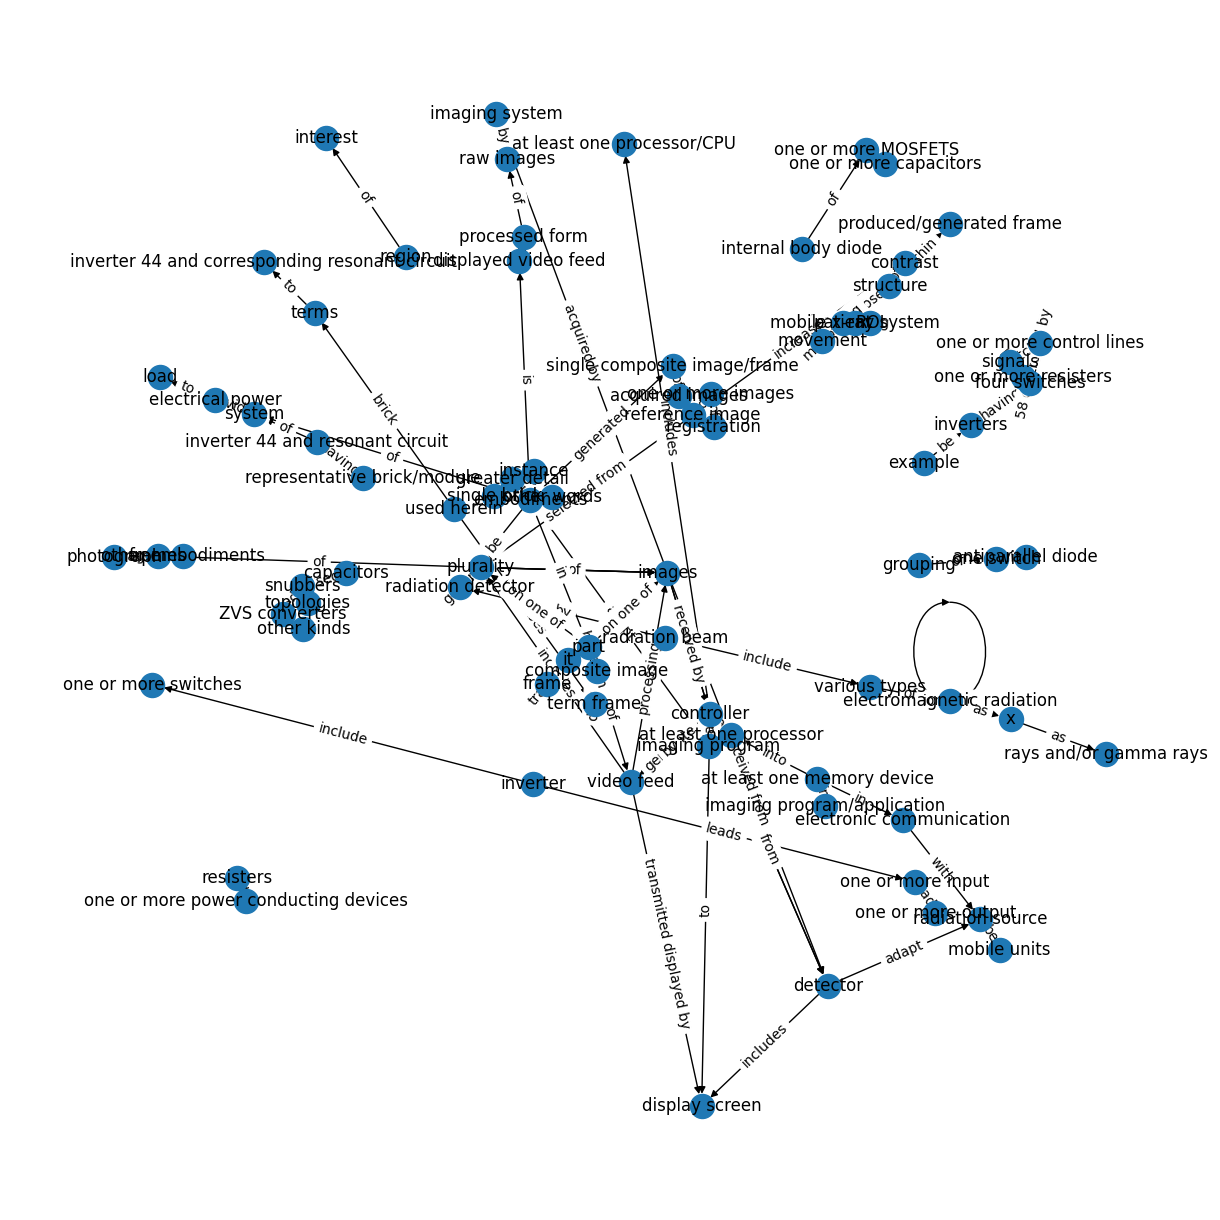

time: 657 ms (started: 2023-04-24 23:26:21 +02:00)


In [108]:
G = nx.from_pandas_edgelist(df, "source", "target",
                            edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12, 12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, pos=pos)

# Add edge labels
edge_labels = {(row['source'], row['target']): row['edge']
               for _, row in df.iterrows()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()


In [109]:
print(cleanNshort)
doc=nlp(cleanNshort)
# displacy.render(doc, style="dep")
noun_chunks = get_noun_chunks(doc, remove_list, exclude_list)
predicates, sources, targets = get_predicates_between_noun_chunks(
    doc, noun_chunks)

displacy.render({'text': cleanNshort, 'ents': noun_chunks + predicates,
                'title': None}, style='ent', manual=True, jupyter=True, options={'colors': {"PRED": funkycolor}})

 18 projects a radiation beam through a region of interest ("ROI") 28 of the patient within which the structure is disposed. The radiation beam is received by the radiation detector, which generates a plurality of images that are then communicated to the controller, which generates a video feed that is transmitted to and displayed by the display screen. As will be appreciated, in embodiments, the radiation detector and/or radiation source may be mobile units, e.g., part of a mobile x-ray system for imaging a patient while minimizing movement 14 of the patient. The radiation beam may include various types of electromagnetic radiation, to include ionizing electromagnetic radiation such as x-rays and/or gamma rays.
As further shown in FIG. 1, the controller includes at least one processor/CPU and at least one memory device, and is in electronic communication with the radiation source, detector, and/or the display screen. An imaging program/application may be stored in the at least one mem

time: 94 ms (started: 2023-04-24 23:26:41 +02:00)


# Semantic Knowledge Graph

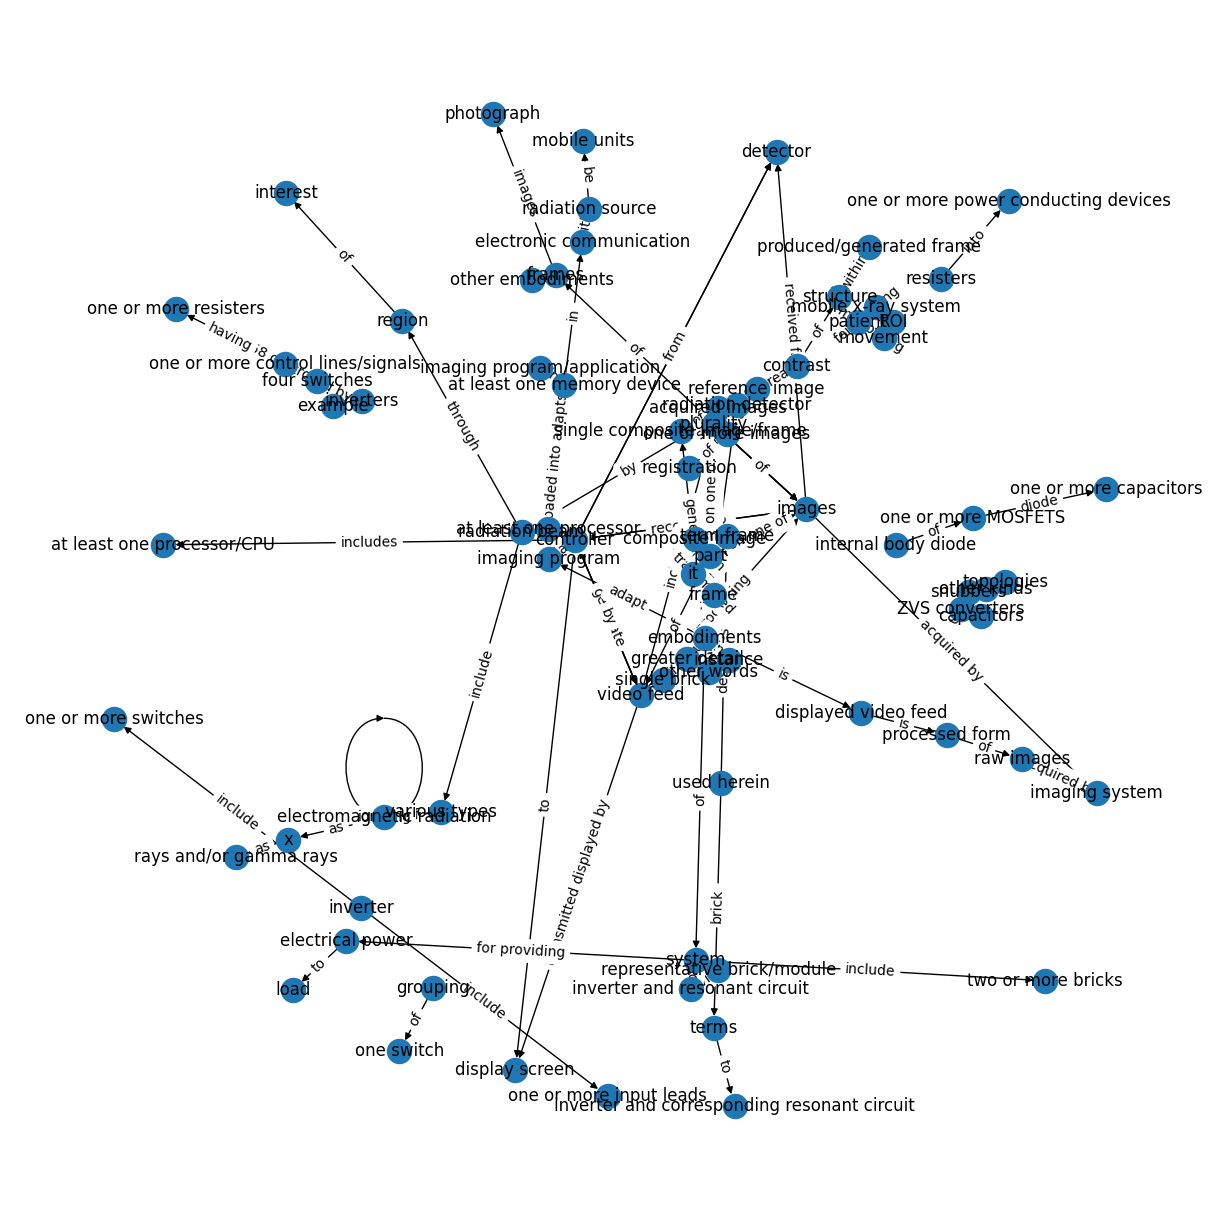

time: 609 ms (started: 2023-04-24 23:26:59 +02:00)


In [110]:
df = pd.DataFrame({'source': [str(s) for s in sources], 
                    'target': [str(t) for t in targets], 
                    'edge': [r['text'] for r in predicates]})

G = nx.from_pandas_edgelist(df, "source", "target",
                            edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12, 12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, pos=pos)

# Add edge labels
edge_labels = {(row['source'], row['target']): row['edge']
               for _, row in df.iterrows()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

In [113]:
#Graph to display the NER and the dependency tree
displacy.render(doc, style="dep", jupyter=True, options={'distance': 90})


time: 31 ms (started: 2023-04-24 23:29:25 +02:00)


## ✅ Conclusion:

In conclusion, for the term extraction, we use patent_terms from our regex function which proved valuable, with some notable successes and challenges. The use of pre-trained Spacy provided a solid foundation for our model, but the performance score decreased after annotation with Prodigy. However, after further annotation rounds, we improved the score to around 64%, which was a significant improvement. Unfortunately, in subsequent rounds, we observed a decline in performance, with the score dropping to 46% when we trained the NER model after correction despite our best efforts to correct the model.

However, with NER Teach the score improved to 73%.  The main challenge with annotations was domain-specific knowledge. With better insights into the domain, maybe a more meaningful term synthesis could have been worked upon.

Overall, we learned that proper annotation is crucial in achieving accurate and consistent results, and we should invest more time in improving the quality of our annotations. Additionally, we were able to build knowledge graphs with comparatively lesser outliers than before, so this is almost a fully connect knowledge graph